In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul  1 13:09:30 2017

@author: paulaan
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Mock Data
x_train = np.linspace(-1, 1, 200)
learning_rate = 0.01
epochs = 100

y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.333


# Variables is the thing we will figure out through our Model
w = tf.Variable(0.0, "weight")
b = tf.Variable(0.001, "bias")
def my_model(X, w, b):
    return tf.add(tf.multiply(X, w), b)
# X and Y refer to our data which hold all dataset among training process
# Placeholder definition is used for those case
X = tf.placeholder("float")
Y = tf.placeholder("float")
#Our model refers to a Mathmetical function
y_model = my_model(X, w, b)
#Our goal is to feed X and figure out w and b in order to minize
cost_function = tf.square(Y - y_model)

#This operation(Algorithm) is used to minimize our cost function 
#according to our feed data X and Y placeholder
train_operation = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#Each training process must belong to Tensorflow Session
session = tf.Session()
init_operation = tf.global_variables_initializer()

session.run(init_operation)

for i in range(1, epochs):
    for x, y in zip(x_train, y_train):
        session.run(train_operation, feed_dict={X: x, Y: y})
        
weight_val = session.run(w)
bias_val = session.run(b)

session.close()

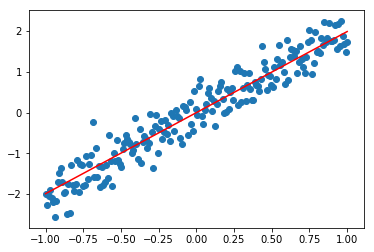

In [14]:
plt.scatter(x_train, y_train)

y_learn = x_train * weight_val + bias_val

plt.plot(x_train, y_learn, 'r')
plt.show()